<div style="text-align:center; font-size:40px; font-family: 'Times New Roman', Times, serif;font-weight: bold;">
    A Comparative Neutronics Analysis of Optimal Shielding Configurations and Materials in Spherical Tokamak Using OpenMC
</div>

(Tokomak fusion reactor base model similar to the MCNP model created by Kai in 2019)

<p style="text-align:justify; font-size:12px; font-family: 'Times New Roman', Times, serif;">The objective of the study was to investigate the optimal shielding materials used within a predefined shielding volume in a spherical tokamak. The primary focus of the study was to replicate the existing MCNP model using openmc and subsequently examine and compare the heating and energy deposition occurring within the central column magnet with the results obtained using MCNP. Materials were characterized concerning their photonic and neutronic behaviour in a fusion environment. Utilizing openmc, both the geometry and materials were modelled within the context of a spherical tokamak. </p>
<p style="text-align:justify; font-size:12px; font-family: 'Times New Roman', Times, serif;">    However, instead of employing conventional OpenMC methodologies, alternative Python packages such as 'paramak' were harnessed to streamline the construction of a geometric model for a straightforward Tokamak reactor configuration. So, Rather than retrieving the OpenMC Docker image, the decision was made to pull the fusion-neutronics workshop image (available at https://github.com/fusion-energy/neutronics-workshop.git) directly from the GitHub repository. This choice was informed by the fact that the workshop image encompasses all the essential packages requisite for the project's execution.</p>

<h1 style="text-align:left; font-size:22px; font-family: 'Times New Roman', Times, serif;font-weight: bold;">I. Installation and Packages Used </h1>

<h2 style="text-align:justify; font-size:12px; font-family: 'Times New Roman', Times, serif; font-weight= bold;">Installation Method</h2>
Here's a concise and rephrased version of the installation procedure:

1. **Install Docker CE:**
   - Install Docker CE for your OS (Ubuntu, Mac OS, or Windows).
   - Follow the instructions to enable Docker to be used as a non-root user.

2. **Pull Docker Image:**
   - Open a terminal or PowerShell window.
   - Enter the command below to pull the Docker image:
     ```
     docker pull ghcr.io/fusion-energy/neutronics-workshop
     ```

3. **Run Docker Container:**
   - Enable graphics linking between your OS and Docker.
   - Run the Docker container using the following command:
     ```
     docker run -p 8888:8888 ghcr.io/fusion-energy/neutronics-workshop
     ```

4. **Access Workshop:**
   - A URL will be displayed in the terminal.
   - Open this URL in your preferred web browser.

By following these steps, you'll successfully set up Docker, pull the required image, run the container, and access the workshop through the provided URL.

<h2 style="text-align:justify; font-size:12px; font-family: 'Times New Roman', Times, serif; font-weight = bold">II. Packages Used in the Fusion-neutronics workshop image</h2>

<div style="font-family: 'Times New Roman', Times, serif; text-align: justify;font-size:12px;">
The fusion-neutronics workshop typically involves the use of various Python packages and libraries to perform tasks related to neutronics simulations and analysis in the context of fusion reactors. While the exact packages used can vary based on the specific workshop content and goals, here are some common Python packages that might be used in a fusion-neutronics workshop:

1. OpenMC: An open-source Monte Carlo particle transport code for simulating neutron and photon transport. It's often used for detailed neutronics simulations in fusion reactor designs.

2. Paramak: A package that simplifies the creation of complex 3D geometries for fusion reactor simulations. It provides a higher-level interface to design and parameterize reactor components.

3. Matplotlib: A popular plotting library for creating static, interactive, and animated visualizations in Python.

4. **NumPy:** A fundamental package for numerical computations in Python. It provides support for arrays, matrices, and mathematical functions.

5. **Pandas:** A library for data manipulation and analysis, often used to handle and process tabular data.

6. **Jupyter Notebook:** An interactive environment that allows you to create and share documents containing live code, equations, visualizations, and explanatory text.

7. **SciPy:** A collection of scientific computing functions built on NumPy. It includes modules for optimization, integration, interpolation, and more.

8. **SymPy:** A symbolic mathematics package that allows for symbolic computation and algebraic manipulations.

9. **Plotly:** An interactive graphing library that creates interactive, web-based visualizations.

10. **IPython:** An enhanced interactive Python shell that provides features like code execution, history, and display capabilities.

11. **h5py:** A package for reading and writing data in the HDF5 format, which is commonly used for storing large datasets.

12. mpi4py: A Python wrapper for the Message Passing Interface (MPI), enabling parallel programming.

These are just a few examples of Python packages that might be used in a fusion-neutronics workshop. Depending on the workshop's objectives, additional specialized packages or tools might also be introduced to address specific simulation and analysis requirements.
</div>


In [36]:
import openmc
import paramak
from paramak import RotateMixedShape
import warnings
from typing import Optional, Union, Iterable

import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import SVG, display



import mpmath
import numpy as np
import sympy as sp
from scipy.interpolate import interp1d
import gmsh
from stl_to_h5m import stl_to_h5m    #need to install pydagmc to convert STL format to h5m to convert the geometry into xml format

<div style="font-family: 'Times New Roman', Times, serif; text-align: justify;font-size:12px;">The provided code snippet imports a set of Python libraries for nuclear engineering and simulation tasks. The `openmc` and `paramak` libraries are used for simulating neutron and photon transport and creating reactor geometries, respectively. The `RotateMixedShape` class from `paramak` is imported to enable the creation of mixed 3D shapes with rotation capability. The code includes libraries for plotting (`matplotlib.pyplot`), image processing (`PIL.Image`), symbolic mathematics (`mpmath`, `numpy`, `sympy`), interpolation (`scipy.interpolate`), and mesh generation (`gmsh`). Additionally, there's a reference to an external function (`stl_to_h5m`) from the `stl_to_h5m` module, which facilitates the conversion of STL geometry files to the h5m format used by DAGMC, a toolkit for geometry-based Monte Carlo simulations. Overall, the code assembles a set of tools for reactor geometry creation, simulation setup, data processing, and mesh generation for further analysis and visualization.</div>

<div style="font-family: 'Times New Roman', Times, serif; text-align: justify;font-size:12px;">
<i>Note:- Mesh generation in OpenMC involves dividing a reactor's geometry into small cells arranged in a grid. These cells represent specific regions where neutronics and radiation interactions occur. By doing so, simulations become more efficient and accurate, as they track particle movement through these cells. These meshes allow for calculations of quantities like neutron flux and energy deposition, helping to analyze the behavior of particles and their impact on different parts of the reactor. Mesh generation is a fundamental step that aids in understanding and optimizing the reactor's shielding, materials, and overall design.</i>


In [37]:
# pip install --upgrade pip
#!pip install --upgrade gmsh
#pip install pydagmc
#!pip install xlsxwriter
#!pip install openpyxl

<div style="font-family: 'Times New Roman', Times, serif; text-align: justify;font-size:12px;"> 
    The above codes are used to install the following packages,
    1. **gmsh**:
   The `gmsh` package is used for generating and manipulating complex geometries, often in the context of mesh generation for scientific simulations. It provides tools to create 3D models and generate structured or unstructured mesh grids. This is particularly useful in various scientific fields, including engineering, physics, and computational modeling.

2. **pydagmc**:
   `pydagmc` is a Python package that interfaces with the DAGMC (Distributed Geometry and Meshing Toolkit with Monte Carlo) toolkit. DAGMC is designed for geometry-based Monte Carlo simulations, commonly used in nuclear and particle physics. `pydagmc` likely provides utilities and tools to work with geometry descriptions and materials within the DAGMC framework.

3. **xlsxwriter**:
   The `xlsxwriter` package enables the creation and modification of Excel files in the XLSX format. It provides an API for writing data, formatting cells, and adding charts to Excel workbooks. This package is especially valuable for automating the generation of Excel reports, spreadsheets, or data storage for various applications, including data analysis and reporting.

4. **openpyxl**:
   `openpyxl` is another Python package for working with Excel files, particularly in the XLSX format. It allows reading, writing, and modifying Excel workbooks, worksheets, and cells. With `openpyxl`, one can extract data, apply formatting, and even create or modify charts within Excel files programmatically. This package is valuable when we need to integrate Excel files into the Python workflow for data manipulation or reporting.</div>

<h1 style="text-align:left; font-size:22px; font-family: 'Times New Roman', Times, serif;font-weight: bold;">II. Geometry Definition </h1>
<div style="font-family: 'Times New Roman', Times, serif; text-align: justify;font-size:12px;">The following codes are used to construct the Tokomak geometry.For it's construction the paramak python package was used.  </div>

In [38]:
angle = 180
#angle = 359.9 # The angle by which the geometry is rotated along the 'Z' axis

<h3 style="font-family: 'Times New Roman', Times, serif; text-align: justify;font-size:12px; font-weight= bold;"> 1. Tie bar</h3>

In [39]:
TieBar = paramak.RotateStraightShape(
    rotation_angle=angle,
    name = "bar",
    points=[
        (0, 250.0),
        (5, 250.0),
        (5, -250.0),
        (0, -250.0)]
)
# Display the geometry using Paramak's built-in 'show' method
TieBar.show()


CadViewerWidget(anchor=None, cad_width=800, glass=False, height=600, pinning=False, theme='light', title=None,…

<div style="text-align:justify; font-size:12px; font-family: 'Times New Roman', Times, serif;">The code above performs a series of steps to visualize and export the tie bar geometry with height = 500cm and radius = 5cm using Python libraries. It uses the paramak library to create a shape with specified parameters, such as rotation angle and vertex coordinates. The shape is then displayed using the show method. The geometry is exported as an SVG file, which is subsequently opened and converted to a PNG image using matplotlib and the PIL library. The resulting PNG image showcases the geometric shape, providing an effective way to visualize and share the design. </div>

<h3 style="font-family: 'Times New Roman', Times, serif; text-align: justify;font-size:12px; font-weight= bold;"> 2. Magnetic Column</h3>


<div style="text-align:justify; font-size:12px; font-family: 'Times New Roman', Times, serif;">The following code defines a magnetic column geometry and its dimensions using Paramak's `CenterColumnShieldCylinder` class. This geometry represents a cylindrical structure, such as a magnet column, with an inner radius of 5 units (`cu_inrad`), an outer radius of 20 units (`cu_outrad`), and a height of 500 units (`cu_h`). The `rotation_angle` parameter specifies the rotation angle in degrees, and the `color` parameter sets the visual color of the geometry. Additionally, the `name` parameter assigns a label to the geometry. The resulting `Magnet_column` geometry can be used for further analysis, visualization, and simulation in neutron transport studies or other applications.</div>

In [40]:
cu_inrad = 5
cu_outrad = 20
cu_h = 500
Magnet_column = paramak.CenterColumnShieldCylinder(
    inner_radius=cu_inrad,
    outer_radius=cu_outrad,
    height=cu_h, #need to correct
    rotation_angle=angle,
    color = (0.9, 0.1, 0.9),
    name = "magnet"
    
)
Magnet_column.show()


CadViewerWidget(anchor=None, cad_width=800, glass=False, height=600, pinning=False, theme='light', title=None,…

<h3 style="font-family: 'Times New Roman', Times, serif; text-align: justify;font-size:12px; font-weight= bold;"> 3. Central Column Shield</h3>


In [41]:
ColumnX = paramak.CenterColumnShieldCylinder(
    inner_radius=23,
    outer_radius=53,
    height=400,
    rotation_angle=angle,
    name = "inshield"
)


In [42]:
#Tripple layer column shield with 5cm inner layer 1cm middle layer and 24cm outer layer
# Define the number of columns and the angle
num_columns1 = 4
num_columns2 = 24

# Create a list to store the center column shields
columns1 = []

# Create center column shields using a loop
for i in range(num_columns1):
    inner_radius = 23 + i
    outer_radius = inner_radius + 1
    column1 = paramak.CenterColumnShieldCylinder(
        inner_radius=inner_radius,
        outer_radius=outer_radius,
        height=400,
        rotation_angle=angle,
        name = 'column1'
    )
   # column1.material = material_tungsten_boride
    columns1.append(column1)

# Create a single CenterColumnShieldCylinder instance for Column6
Column6 = paramak.CenterColumnShieldCylinder(
    inner_radius=28,
    outer_radius=29,
    height=400,
    rotation_angle=angle,
    name = 'hafniumcolumn',
    color=(0.1, 0.2, 0.1)  # Set the color for Column6
)

columns2 = []

# Create center column shields using a loop
for i in range(num_columns2):
    inner_radius = 29 + i
    outer_radius = inner_radius + 1
    column2 = paramak.CenterColumnShieldCylinder(
        inner_radius=inner_radius,
        outer_radius=outer_radius,
        height=400,
        rotation_angle=angle,
        name = 'column2'
    )
   # column2.material = material_tungsten_boride
    columns2.append(column2)

# Create the Reactor with all the center column shields
ColumnShield = paramak.Reactor([Column6] + columns1 + columns2)

# Visualize all the shapes together
ColumnShield.show()


#Export the geometry as an SVG file named 'ColumnShield_geometry.svg'
ColumnShield.export_svg('ColumnShield_geometry.svg')


100% ⋮————————————————————————————————————————————————————————————⋮ (29/29)  0.31s


CadViewerWidget(anchor=None, cad_width=800, glass=False, height=600, pinning=False, theme='light', title=None,…

Saved file as  ColumnShield_geometry.svg


'ColumnShield_geometry.svg'

<div style="text-align:justify; font-size:12px; font-family: 'Times New Roman', Times, serif;">The above code snippet generates a complex geometrical configuration of a triple-layer column shield for a reactor design. The shield consists of multiple cylindrical segments forming the central column. In the first loop, four layers are created with increasing radii, each having an inner radius 23 cm more than the previous layer and a constant outer radius. Then, a single cylindrical section named 'hafniumcolumn' is added with predefined dimensions. Another loop creates 24 additional cylindrical layers with increasing radii, following the same pattern as the first loop. All the individual components are stored in lists. Finally, these components are combined using the Reactor class from the paramak library to create the complete column shield structure. The resulting geometry is then displayed together for visualization purposes. The code showcases the use of loops and modular design to create a sophisticated reactor shield configuration.</div>

<h3 style="font-family: 'Times New Roman', Times, serif; text-align: justify;font-size:12px; font-weight= bold;"> 4. Vacuum Vessel</h3>



In [43]:
component = paramak.BlanketConstantThicknessArcV(
    inner_lower_point=(29, -200.5),
    inner_mid_point=(258, 0),
    inner_upper_point=(29, 200.5),
    thickness=30,
    rotation_angle= angle,    #angle,
    name = "Blanket"
)
#component.show()

<div style="text-align:justify; font-size:12px; font-family: 'Times New Roman', Times, serif;">This code segment defines a geometric component using the paramak library for a blanket structure in a reactor design. The component is specified as a constant-thickness arc segment using three key points on its inner surface: inner_lower_point, inner_mid_point, and inner_upper_point. The thickness parameter is set to 30 units, determining the radial thickness of the blanket. The rotation_angle parameter determines the angle at which the arc segment is rotated. The name of the component is set to "Blanket". The show() method (which is commented out) would be used to visualize the geometry. </div>

<h3 style="font-family: 'Times New Roman', Times, serif; text-align: justify;font-size:12px; font-weight= bold;"> 4. Plasma</h3>


_(For plasma to get the right structure the 'Shape' class file must be rewritten for semicircular wire.)_ 

<div style="text-align:justify; font-size:12px; font-family: 'Times New Roman', Times, serif;"> The following code defines a plasma geometry using Paramak's Plasma class, named ITER1. This geometry represents the plasma region within a fusion reactor, with specific geometric parameters. The major_radius is set to 150cm, representing the distance from the center of the torus to the outer edge of the plasma. The minor_radius is set to 65cm, indicating the distance from the center to the inner edge of the plasma. The parameters triangularity and elongation describe the shape of the plasma. The rotation_angle specifies the rotation angle of the geometry around the Z-axis in degrees. The color parameter sets the visual color of the plasma. The resulting TER1 geometry represents the plasma configuration within the fusion reactor and can be used for analysis, visualization, and simulations related to plasma behavior.</div>

In [67]:

ITER1 = paramak.Plasma(
    major_radius=150,
    minor_radius=65,
    triangularity=0.33,
    elongation=2,
    name="ITER_plasma",
    rotation_angle=angle,
    color=(1,0,0)
)

ITER1.show()


CadViewerWidget(anchor=None, cad_width=800, glass=False, height=600, pinning=False, theme='light', title=None,…

In [45]:
# Initialize Gmsh
gmsh.initialize()
#essential before utilizing Gmsh's functionalities within the code

<h3 style="font-family: 'Times New Roman', Times, serif; text-align: justify;font-size:12px; font-weight= bold;"> 5. Full Reactor (Sperical Tokomak)</h3>


<div style="text-align:justify; font-size:12px; font-family: 'Times New Roman', Times, serif;">The following code creates a reactor geometry named `myreactor` using Paramak's `Reactor` class. This geometry is composed of various components, including the `TieBar`, `ITER1`, `Magnet_column`, `component`, and `ColumnX`. These components represent different parts of the reactor, such as shielding elements, plasma, magnet columns, and more. The `myreactor` geometry is formed by assembling these components together. The `show()` method is then used to visualize the assembled reactor geometry. This visualization provides an overview of the reactor's components and their arrangement, aiding in understanding the overall reactor design and layout.</div>

100% ⋮————————————————————————————————————————————————————————————⋮ (5/5)  0.01s


CadViewerWidget(anchor=None, cad_width=800, glass=False, height=600, pinning=False, theme='light', title=None,…

Saved file as  myreactor_geometry.svg


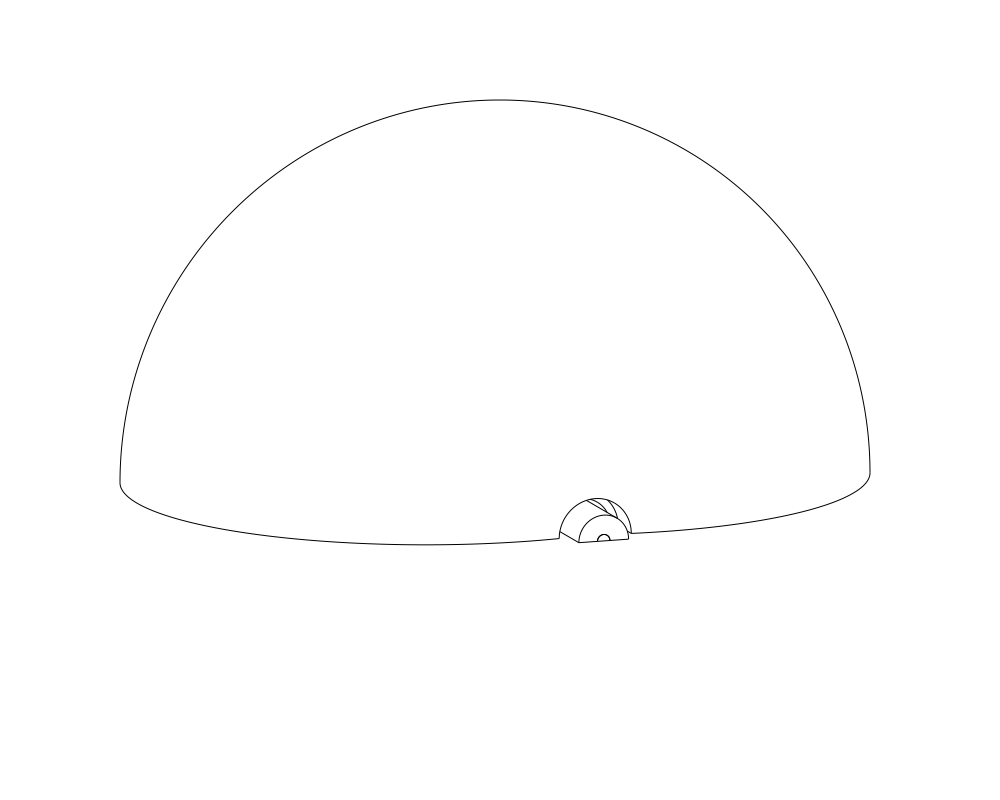

In [66]:
myreactor = paramak.Reactor([   TieBar, 
                                ITER1,
                                Magnet_column,
                                component, 
                                ColumnX,
                                ]
                            
                           
                           )

myreactor.show()


#Export the geometry as an SVG file named 'myreactor_geometry.svg'
myreactor.export_svg('myreactor_geometry.svg')


# After exporting SVG
display(SVG(filename='myreactor_geometry.svg'))


<h3 style="font-family: 'Times New Roman', Times, serif; text-align: justify;font-size:12px; font-weight= bold;">Geometry Conversion</h3>
<div style="font-family: 'Times New Roman', Times, serif; text-align: justify;font-size:12px">The following OpenMC code exports the geometry of the reactor, represented by the `myreactor` object, to the DAGMC (Distributed Geometry and Meshing Toolkit with Monte Carlo) format h5m file. This format is suitable for geometry-based Monte Carlo simulations. The function `export_dagmc_h5m()` takes several parameters:

- `filename='dagmc.h5m'`: This parameter specifies the name of the h5m file where the exported geometry will be stored. In this case, the filename is set to 'dagmc.h5m'.

- `min_mesh_size=10`: This parameter sets the minimum mesh size for the exported geometry. It determines the smallest element size in the mesh.

- `max_mesh_size=20`: This parameter sets the maximum mesh size for the exported geometry. It determines the largest element size in the mesh.
    
This code is essential in OpenMC simulations using paramak because it transforms the reactor geometry into a format compatible with DAGMC-based simulations, ensuring accurate and efficient Monte Carlo simulations of neutron and particle behavior within the defined reactor geometry.</div>

In [74]:
!rm dagmc1.h5m
myreactor.export_dagmc_h5m(filename='dagmc1.h5m', min_mesh_size=10, max_mesh_size=20)
    #************************Made a change here [dagmc ---> dagmc1.h5m] so that an accidental execution won't delete the dagmc.h5m required for
    # further computation. 

assembly found
checking new shape against 5 parts
    checking shape against brep part 1
    checking shape against brep part 2
    checking shape against brep part 3
    checking shape against brep part 4
    checking shape against brep part 5
    checking shape against brep part 6
    checking shape against brep part 7
    checking shape against brep part 8
    checking shape against brep part 9
    checking shape against brep part 10
    single matching pair, brep id = 1 shape id = 1
checking new shape against 4 parts
    checking shape against brep part 1
    checking shape against brep part 2
    checking shape against brep part 3
    checking shape against brep part 4
    checking shape against brep part 5
    checking shape against brep part 6
    checking shape against brep part 7
    checking shape against brep part 8
    checking shape against brep part 9
    checking shape against brep part 10
    single matching pair, brep id = 2 shape id = 2
checking new shape against 3 pa

/usr/local/lib/python3.9/site-packages/brep_part_finder/core.py:177: UserWarning: No parts matching the specified bounding_box_xmin +/- tolerances were found
  warnings.warn(
/usr/local/lib/python3.9/site-packages/brep_part_finder/core.py:177: UserWarning: No parts matching the specified bounding_box_ymin +/- tolerances were found
  warnings.warn(
/usr/local/lib/python3.9/site-packages/brep_part_finder/core.py:177: UserWarning: No parts matching the specified bounding_box_zmin +/- tolerances were found
  warnings.warn(
/usr/local/lib/python3.9/site-packages/brep_part_finder/core.py:177: UserWarning: No parts matching the specified bounding_box_xmax +/- tolerances were found
  warnings.warn(
/usr/local/lib/python3.9/site-packages/brep_part_finder/core.py:177: UserWarning: No parts matching the specified bounding_box_ymax +/- tolerances were found
  warnings.warn(
/usr/local/lib/python3.9/site-packages/brep_part_finder/core.py:177: UserWarning: No parts matching the specified bounding_bo

Info    : [ 30%] Meshing surface 7 (Plane, MeshAdapt)
Info    : [ 30%] Meshing surface 8 (Plane, MeshAdapt)
Info    : [ 40%] Meshing surface 9 (Plane, MeshAdapt)
Info    : [ 40%] Meshing surface 10 (Cylinder, MeshAdapt)
Info    : [ 40%] Meshing surface 11 (Plane, MeshAdapt)
Info    : [ 50%] Meshing surface 12 (Plane, MeshAdapt)
Info    : [ 50%] Meshing surface 13 (Plane, MeshAdapt)
Info    : [ 60%] Meshing surface 14 (Surface of Revolution, MeshAdapt)
Info    : [ 60%] Meshing surface 15 (Cylinder, MeshAdapt)
Info    : [ 60%] Meshing surface 16 (Surface of Revolution, MeshAdapt)
Info    : [ 70%] Meshing surface 17 (Cylinder, MeshAdapt)
Info    : [ 70%] Meshing surface 18 (Plane, MeshAdapt)
Info    : [ 80%] Meshing surface 19 (Plane, MeshAdapt)
Info    : [ 80%] Meshing surface 20 (Plane, MeshAdapt)
Info    : [ 80%] Meshing surface 21 (Cylinder, MeshAdapt)
Info    : [ 90%] Meshing surface 22 (Plane, MeshAdapt)
Info    : [ 90%] Meshing surface 23 (Cylinder, MeshAdapt)
Info    : [100%] Mesh

'dagmc.h5m'

In [14]:
bound_dag_univ = openmc.DAGMCUniverse(filename='dagmc.h5m').bounded_universe()
my_geometry = openmc.Geometry(root=bound_dag_univ)


<div style="text-align:justify; font-size:12px; font-family: 'Times New Roman', Times, serif;">These lines of code mentioned above prepare the DAGMC-based geometry for use in an OpenMC simulation. The first line creates a bounded universe encapsulating the geometry from the DAGMC h5m file, and the second line sets up the simulation geometry using this universe as the root, ready for performing neutron and particle transport simulations using OpenMC.</div>


<h1 style="text-align:left; font-size:22px; font-family: 'Times New Roman', Times, serif;font-weight: bold;">II. Material Definition </h1>
<div style="font-family: 'Times New Roman', Times, serif; text-align: justify;font-size:12px;">The following codes are used to define the materials used in the Tokomak components.  </div>

<h3 style="font-family: 'Times New Roman', Times, serif; text-align: justify;font-size:12px; font-weight= bold;"> Code Defnition</h3>


The following code snippet defines various materials for use in OpenMC simulations and exports them to XML files. 
   
1. **'inshield' Material Compositions:**
   - A list of "compositions" is defined, containing different material compositions.
   - Each composition includes a density and either 'elements' or 'nuclides' data specifying the elemental or nuclide composition, along with their amounts and units.

2. **Defining Other Materials:**
   - Material properties for various materials are defined using the `openmc.Material` class. These materials include plasma, tungsten, copper, and stainless steel.
   - Each material's composition is defined using either elemental or nuclide components along with their respective amounts and units.
   - The density of each material is set using the `set_density` method.

3. **Loop for Creating and Exporting Materials:**
   - A loop iterates over the defined compositions, creating 'inshield' materials based on the provided data.
   - The loop checks if the composition contains 'elements' or 'nuclides', then adds corresponding elements or nuclides to the material.
   - The density for each 'inshield' material is set based on the provided composition density.
   - All defined materials are combined into the "all_materials" list.

4. **Exporting Materials to XML Files:**
   - The materials are exported to separate XML files using the `export_to_xml` method of the `openmc.Materials` class.
   - Each material's XML file is named "Newmaterial_file_X.xml" where X is the index of the composition in the 'compositions' list.

In summary, this code snippet creates and defines various materials, including 'inshield' materials with different compositions, densities, and properties. It then exports these materials to XML files for use in OpenMC simulations.

In [68]:

cu_den = 8.96     #density of the magnetic material

# Define common name tag and density for materials with name 'inshield'
name_tag = 'inshield'
density = 'g/cm3'

# Define the 'inshield' material compositions

import openmc

# Define the 'inshield' material compositions
compositions = [
    {
        
#1)Tungsten diboride
                         #Newmaterial_file_1.xml
        'density': 14.80,
        'nuclides': [
            {'nuclide': 'W180', 'amount': 0.001046193, 'unit': 'wo'},
            {'nuclide': 'W182', 'amount': 0.23103439, 'unit': 'wo'},
            {'nuclide': 'W183', 'amount': 0.12475857, 'unit': 'wo'},
            {'nuclide': 'W184', 'amount': 0.267128064, 'unit': 'wo'},
            {'nuclide': 'W186', 'amount': 0.247860668, 'unit': 'wo'},
            {'nuclide': 'B10', 'amount': 0.025506251, 'unit': 'wo'},
            {'nuclide': 'B11', 'amount': 0.102665864, 'unit': 'wo'}
        ],
    },
    
    {

#2)Hafnium hydride
                        #Newmaterial_file_2.xml
        'density': 11.40,
        'nuclides': [
            {'nuclide': 'Hf174', 'amount': 0.001582131, 'unit': 'wo'},
            {'nuclide': 'Hf176', 'amount': 0.052012549, 'unit': 'wo'},
            {'nuclide': 'Hf177', 'amount': 0.183922703, 'unit': 'wo'},
            {'nuclide': 'Hf178', 'amount': 0.269753297, 'unit': 'wo'},
            {'nuclide': 'Hf179', 'amount': 0.134678882, 'unit': 'wo'},
            {'nuclide': 'Hf180', 'amount': 0.346882173, 'unit': 'wo'},
            {'nuclide': 'H1', 'amount': 0.01116698, 'unit': 'wo'},
            {'nuclide': 'H2', 'amount': 0.00000128435, 'unit': 'wo'}
        ],
    },
    {

#3)Zirconium hydride
                     #Newmaterial_file_3.xml
        'density': 5.6,
        'nuclides': [
            {'nuclide': 'Zr90', 'amount': 0.503376273, 'unit': 'wo'},
            {'nuclide': 'Zr91', 'amount': 0.109774184, 'unit': 'wo'},
            {'nuclide': 'Zr92', 'amount': 0.167792091, 'unit': 'wo'},
            {'nuclide': 'Zr94', 'amount': 0.170042364, 'unit': 'wo'},
            {'nuclide': 'Zr96', 'amount': 0.027394627, 'unit': 'wo'},
            {'nuclide': 'H1', 'amount': 0.021617974, 'unit': 'wo'},
            {'nuclide': 'H2', 'amount': 0.00000248635, 'unit': 'wo'}
        ],
    },

#4)Tungsten
                 #Newmaterial_file_4.xml
    {
        'density': 19.3,
        'nuclides': [
            {'nuclide': 'W180', 'amount': 0.001175, 'unit': 'wo'},
            {'nuclide': 'W182', 'amount': 0.262270, 'unit': 'wo'},
            {'nuclide': 'W183', 'amount': 0.142406, 'unit': 'wo'},
            {'nuclide': 'W184', 'amount': 0.306582, 'unit': 'wo'},
            {'nuclide': 'W186', 'amount': 0.287567, 'unit': 'wo'}
        ]
    },
    
#5)Tantalum Boride (TaB2)
                     #Newmaterial_file_5.xml 
    {
        'density': 12.54,
        'nuclides': [
            {'nuclide': 'Ta180', 'amount': 0.000107281, 'unit': 'wo'},
            {'nuclide': 'Ta181', 'amount': 0.893153995, 'unit': 'wo'},
            {'nuclide': 'B10', 'amount': 0.021241006, 'unit': 'wo'},
            {'nuclide': 'B11', 'amount': 0.085497718, 'unit': 'wo'}
        ]
    },
    
    
#6)Hafnium diBoride (HfB2)
                     #Newmaterial_file_6.xml
    {
        'density': 11.19,  # Replace with the actual density of Hafnium Diboride
        'nuclides': [
            {'nuclide': 'Hf174', 'amount': 0.001427116, 'unit': 'wo'},
            {'nuclide': 'Hf176', 'amount': 0.046916441, 'unit': 'wo'},
            {'nuclide': 'Hf177', 'amount': 0.165902243, 'unit': 'wo'},
            {'nuclide': 'Hf178', 'amount': 0.24332329, 'unit': 'wo'},
            {'nuclide': 'Hf179', 'amount': 0.121483256, 'unit': 'wo'},
            {'nuclide': 'Hf180', 'amount': 0.312895199, 'unit': 'wo'},
            {'nuclide': 'B10', 'amount': 0.021502438, 'unit': 'wo'},
            {'nuclide': 'B11', 'amount': 0.086550016, 'unit': 'wo'}
        ],
    },
    
#7)Tantalum carbide (TaC)
                     #Newmaterial_file_7.xml
    {
        'density': 14.5,  # Replace with the actual density of Tantalum Carbide
        'nuclides': [
            {'nuclide': 'Ta180', 'amount': 0.000112624, 'unit': 'wo'},
            {'nuclide': 'Ta181', 'amount': 0.937642235, 'unit': 'wo'},
            {'nuclide': 'C12', 'amount': 0.061579118, 'unit': 'wo'},
            {'nuclide': 'C13', 'amount': 0.000666023, 'unit': 'wo'}
        ],
    },
    

#8) Hafnium Carbide (HfC)
                     #Newmaterial_file_8.xml 
    {
        'density': 12.76,  # Replace with the actual density of Hafnium Carbide
        'nuclides': [
            {'nuclide': 'Hf174', 'amount': 0.00149912, 'unit': 'wo'},
            {'nuclide': 'Hf176', 'amount': 0.049283575, 'unit': 'wo'},
            {'nuclide': 'Hf177', 'amount': 0.174272718, 'unit': 'wo'},
            {'nuclide': 'Hf178', 'amount': 0.255599987, 'unit': 'wo'},
            {'nuclide': 'Hf179', 'amount': 0.127612603, 'unit': 'wo'},
            {'nuclide': 'Hf180', 'amount': 0.328682095, 'unit': 'wo'},
            {'nuclide': 'C12', 'amount': 0.062375267, 'unit': 'wo'},
            {'nuclide': 'C13', 'amount': 0.000674634, 'unit': 'wo'}
        ],
    },
    
#9) Zirconium diboride (ZrB2)    
                #Newmaterial_file_9.xml 
    {
        'density': 6.17,  
        'nuclides': [
            {'nuclide': 'Zr90', 'amount': 0.415918058, 'unit': 'wo'},
            {'nuclide': 'Zr91', 'amount': 0.090701664, 'unit': 'wo'},
            {'nuclide': 'Zr92', 'amount': 0.138639353, 'unit': 'wo'},
            {'nuclide': 'Zr94', 'amount': 0.140498656, 'unit': 'wo'},
            {'nuclide': 'Zr96', 'amount': 0.022634996, 'unit': 'wo'},
            {'nuclide': 'B10', 'amount': 0.038129847, 'unit': 'wo'},
            {'nuclide': 'B11', 'amount': 0.153477425, 'unit': 'wo'}
        ],
    },
    
#10) Titanium diboride (TiB2)    
                #Newmaterial_file_10.xml  
    {
        'density': 4.38,  # Replace with the actual density of Titanium Diboride
        'nuclides': [
            {'nuclide': 'Ti46', 'amount': 0.056829394, 'unit': 'wo'},
            {'nuclide': 'Ti47', 'amount': 0.051249781, 'unit': 'wo'},
            {'nuclide': 'Ti48', 'amount': 0.507813689, 'unit': 'wo'},
            {'nuclide': 'Ti49', 'amount': 0.037266306, 'unit': 'wo'},
            {'nuclide': 'Ti50', 'amount': 0.035681971, 'unit': 'wo'},
            {'nuclide': 'B10', 'amount': 0.061920613, 'unit': 'wo'},
            {'nuclide': 'B11', 'amount': 0.249238247, 'unit': 'wo'}
        ],
    },


    
#11) Tungsten carbide (WC)    
                #Newmaterial_file_11.xml 
    
    {
        'density': 15.63,  # Replace with the actual density of Tungsten Carbide
        'nuclides': [
            {'nuclide': 'W180', 'amount': 0.00112641, 'unit': 'wo'},
            {'nuclide': 'W182', 'amount': 0.248748766, 'unit': 'wo'},
            {'nuclide': 'W183', 'amount': 0.134324334, 'unit': 'wo'},
            {'nuclide': 'W184', 'amount': 0.287609894, 'unit': 'wo'},
            {'nuclide': 'W186', 'amount': 0.266865186, 'unit': 'wo'},
            {'nuclide': 'C12', 'amount': 0.060669229, 'unit': 'wo'},
            {'nuclide': 'C13', 'amount': 0.000656182, 'unit': 'wo'}
        ],
    },

 #12)   Concrete (Portland)
            #Newmaterial_file_12.xml
     {
    'density': 2.3,  # Replace with the actual density value
    'elements': [
        {'element': 'H', 'amount': 0.168753, 'unit': 'ao'},
        {'element': 'C', 'amount': 0.001416, 'unit': 'ao'},
        {'element': 'O', 'amount': 0.562526, 'unit': 'ao'},
        {'element': 'Na', 'amount': 0.011838, 'unit': 'ao'},
        {'element': 'Mg', 'amount': 0.0014, 'unit': 'ao'},
        {'element': 'Al', 'amount': 0.021354, 'unit': 'ao'},
        {'element': 'Si', 'amount': 0.204119, 'unit': 'ao'},
        {'element': 'K', 'amount': 0.005656, 'unit': 'ao'},
        {'element': 'Ca', 'amount': 0.018674, 'unit': 'ao'},
        {'element': 'Fe', 'amount': 0.004264, 'unit': 'ao'}
        ]
    },
    
# 13)  Lead (Pb)
        #Newmaterial_file_13.xml
    {
        'density': 11.35,
        'elements': [
            {'element': 'Pb', 'amount': 1.000000, 'unit': 'wo'}
        ],
    },
# 14) Steel, Medium carbon   
            #Newmaterial_file_14.xml
    {
         'density': 7.872,
         'elements': [
            {'element': 'C', 'amount': 0.022813, 'unit': 'ao'},
            {'element': 'Mn', 'amount': 0.008977, 'unit': 'ao'},
            {'element': 'P', 'amount': 0.000708, 'unit': 'ao'},
            {'element': 'S', 'amount': 0.000854, 'unit': 'ao'},
            {'element': 'Fe', 'amount': 0.966648, 'unit': 'ao'}
            ]
    },

#15) Light water
        #Newmaterial_file_15.xml
    {
        'density': 0.997,
        'nuclides': [
            {'nuclide': 'H1', 'amount': 0.111872, 'unit': 'wo'},
            {'nuclide': 'H2', 'amount': 0.000026, 'unit': 'wo'},
            {'nuclide': 'O16', 'amount': 0.885692, 'unit': 'wo'},
            {'nuclide': 'O17', 'amount': 0.000359, 'unit': 'wo'},
            {'nuclide': 'O18', 'amount': 0.002048, 'unit': 'wo'}
        ],
    },
    
#16) Lithium Hydride
        #Newmaterial_file_16.xml
    {
       'density': 0.82,
       'nuclides': [
           {'nuclide': 'H1', 'amount': 0.126802675, 'unit': 'wo'},
           {'nuclide': 'H2', 'amount': 0.000014584, 'unit': 'wo'},
           {'nuclide': 'Li6', 'amount': 0.06627457, 'unit': 'wo'},
           {'nuclide': 'Li7', 'amount': 0.806908171, 'unit': 'wo'}
       ],
    },

#17) Boron Carbide     
        #Newmaterial_file_17.xml
    {
    'density': 2.52,  # Replace with the actual density value
    'nuclides': [
        {'nuclide': 'B10', 'amount': 0.155743408, 'unit': 'wo'},
        {'nuclide': 'B11', 'amount': 0.626886781, 'unit': 'wo'},
        {'nuclide': 'C12', 'amount': 0.215043954, 'unit': 'wo'},
        {'nuclide': 'C13', 'amount': 0.002325857, 'unit': 'wo'}
    ]
   },
    
    
# 18)  Cadmium (Cd)
        #Newmaterial_file_18.xml
    {
        'density': 8.65,
        'elements': [
            {'element': 'Cd', 'amount': 1.000000, 'unit': 'wo'}
        ],
    },
    
# 19)  Gadolinium (Gd)
        #Newmaterial_file_19.xml
    {
        'density': 7.9004,
        'elements': [
            {'element': 'Gd', 'amount': 1.000000, 'unit': 'wo'}
        ],
    },
    
    
# 20)  Indium (In)
        #Newmaterial_file_20.xml
    {
        'density': 7.31,
        'elements': [
            {'element': 'In', 'amount': 1.000000, 'unit': 'wo'}
        ],
    },
    
    
# 21)  Silver (Ag)
        #Newmaterial_file_21.xml
    {
        'density': 10.5,
        'elements': [
            {'element': 'Ag', 'amount': 1.000000, 'unit': 'wo'}
        ],
    },
    
    
    
# 22) Steel, Boron Stainless
        #Newmaterial_file_22.xml
    
    {
    'density': 7.87,  
    'elements': [
        {'element': 'Cr', 'amount': 0.196075, 'unit': 'ao'},
        {'element': 'Ni', 'amount': 0.118895, 'unit': 'ao'},
        {'element': 'B', 'amount': 0.056685, 'unit': 'ao'},
        {'element': 'C', 'amount': 0.002181, 'unit': 'ao'},
        {'element': 'N', 'amount': 0.000374, 'unit': 'ao'},
        {'element': 'P', 'amount': 0.000034, 'unit': 'ao'},
        {'element': 'S', 'amount': 0.000049, 'unit': 'ao'},
        {'element': 'Co', 'amount': 0.000267, 'unit': 'ao'},
        {'element': 'Si', 'amount': 0.012871, 'unit': 'ao'},
        {'element': 'Mn', 'amount': 0.018214, 'unit': 'ao'},
        {'element': 'Fe', 'amount': 0.594355, 'unit': 'ao'}
        ]
    },
    
# 23)  Beryllium (Be)
        #Newmaterial_file_23.xml 
    {
        'density': 1.848,
        'elements': [
            {'element': 'Be', 'amount': 1.000000, 'unit': 'wo'}
        ],
    },
    
# 24)  Tantalum (Ta)
        #Newmaterial_file_23.xml 
    {
        'density': 16.654,
        'elements': [
            {'element': 'Ta', 'amount': 1.000000, 'unit': 'wo'}
        ],
    },
    
    
    # Add more 'inshield' material compositions here...
]


    
# Define other materials with their compositions
# Plasma Material
material_plasma = openmc.Material(material_id=1, name='ITER_plasma')
material_plasma.add_element('H', 1, 'wo')
material_plasma.set_density('g/cm3', 0.00001)




# Tungsten (M20 in MCNP Model)
material_tungsten = openmc.Material(material_id=6, name='Blanket')
material_tungsten.add_nuclide('W180', 0.001175, 'wo')
material_tungsten.add_nuclide('W182', 0.262270, 'wo')
material_tungsten.add_nuclide('W183', 0.142406, 'wo')
material_tungsten.add_nuclide('W184', 0.306582, 'wo')
material_tungsten.add_nuclide('W186', 0.287567, 'wo')
material_tungsten.set_density('g/cm3', 19.3)

# Copper
material_copper = openmc.Material(material_id=3, name='magnet')
material_copper.add_nuclide('Cu63', 0.684792, 'wo')
material_copper.add_nuclide('Cu65', 0.315208, 'wo')
material_copper.set_density('g/cm3', 8.96)

# Stainless Steel 301
material_stainless_steel = openmc.Material(material_id=4, name='bar')
material_stainless_steel.add_nuclide('C12', 0.001502, 'wo')
material_stainless_steel.add_nuclide('Cr50', 0.007095, 'wo')
material_stainless_steel.add_nuclide('Cr52', 0.142289, 'wo')
material_stainless_steel.add_nuclide('Cr53', 0.016445, 'wo')
material_stainless_steel.add_nuclide('Cr54', 0.004171, 'wo')
material_stainless_steel.add_nuclide('Mn55', 0.020000, 'wo')
material_stainless_steel.add_nuclide('Fe54', 0.041692, 'wo')
material_stainless_steel.add_nuclide('Fe56', 0.678693, 'wo')
material_stainless_steel.add_nuclide('Fe57', 0.015954, 'wo')
material_stainless_steel.add_nuclide('Fe58', 0.002160, 'wo')
material_stainless_steel.add_nuclide('Ni58', 0.047038, 'wo')
material_stainless_steel.add_nuclide('Ni60', 0.018743, 'wo')
material_stainless_steel.add_nuclide('Ni61', 0.000828, 'wo')
material_stainless_steel.add_nuclide('Ni62', 0.002684, 'wo')
material_stainless_steel.add_nuclide('Ni64', 0.000706, 'wo')
material_stainless_steel.set_density('g/cm3', 8.0)




# Loop to create and export materials with different compositions
for i, composition in enumerate(compositions):
    material_inshield = openmc.Material(material_id=10 + i, name='inshield')
    
    if 'elements' in composition:
        for element in composition['elements']:
            material_inshield.add_element(element['element'], element['amount'])
    
    if 'nuclides' in composition:
        for nuclide in composition['nuclides']:
            material_inshield.add_nuclide(nuclide['nuclide'], nuclide['amount'], nuclide['unit'])
    
    material_inshield.set_density('g/cm3', composition['density'])  # Set the density for each composition

    
 

    
    # Combine all materials in a list
    all_materials = [
        material_plasma, material_tungsten, 
        material_copper, material_stainless_steel, 
        material_inshield
    ]
    
    # Export the materials to the XML file
    materials_file = openmc.Materials(all_materials)
    materials_file.export_to_xml(f"Newmaterial_file_{i+1}.xml")


/usr/local/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/usr/local/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=6.
  warn(msg, IDWarning)
/usr/local/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=3.
  warn(msg, IDWarning)
/usr/local/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)
/usr/local/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=10.
  warn(msg, IDWarning)
/usr/local/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=11.
  warn(msg, IDWarning)
/usr/local/lib/python3.9/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=12.
  war

<div style="text-align:justify; font-size:12px; font-family: 'Times New Roman', Times, serif;"> The above code generates the material XML files (Newmaterial_file_i.xml) for all the materials defined. A loop is created to iterate and generate different material xml files mentioned in the 'composition' section (materials defined for the shield) along with the rest of the materials defined for other components</div>

# For New shielding materials make the changes here

In [70]:
material = 'Ta(181)Boride'  # Tag and define the name of the 'material' in the resulting sata set


In [71]:
materialfilez = openmc.Materials.from_xml('Newmaterial_file_5.xml')  # Reads the material xml file mentioned and will use it for further computation.  

# Tally for Heating 

In [72]:
#tally1 = openmc.Tally()
material_filter = openmc.MaterialFilter(material_copper)  # the magnet material
tally1 = openmc.Tally(name='magnet_heating')
tally1.filters = [material_filter]
tally1.scores = ['heating']
trigger = openmc.Trigger('rel_err', 0.10)




tally1.triggers = [trigger]


<div style="text-align:justify; font-size:12px; font-family: 'Times New Roman', Times, serif;"> The above code is used to calculate the heating tally. The trigger setting will provide a reasonable error for the heating tally value. </div>

# Tally for damage

In [73]:
# Define the damage-energy tally
tally_damage = openmc.Tally(name='magnet_damage')
tally_damage.filters = [material_filter]
tally_damage.scores = ['damage-energy']
trigger1 = openmc.Trigger('rel_err', 0.10)
tally_damage.triggers = [trigger1]

<div style="text-align:justify; font-size:12px; font-family: 'Times New Roman', Times, serif;"> The code above calculates the radiation damage in terms of energy and the trigger setting gives a reasonbale error for the same result. </div>

In [74]:
my_tallies = openmc.Tallies([tally1,
                             tally_damage])

<div style="text-align:justify; font-size:12px; font-family: 'Times New Roman', Times, serif;"> This code combines both the heating tally and damage tally. </div>

In [75]:
part = 33000
my_settings = openmc.Settings(batches = 10, particles = part, run_mode = 'fixed source')
# Sets the particle size and batch number

In [76]:
# Assigns a ring source of DT energy neutrons to the source. This source has a
# 14MeV neutron energy, with a radius of 150cm and is half a ring (0 to 360 degrees)
# If you are keen to make more realistic plasma sources take a looks at the
# openmc_plasma_source python package https://github.com/fusion-energy/openmc-plasma-source

my_source = openmc.Source()
my_source.angle = openmc.stats.Isotropic()
my_source.energy = openmc.stats.Discrete([14e6], [1])
my_source.space = openmc.stats.CylindricalIndependent(
    r=openmc.stats.Discrete([150], [1]),  # all source points at a radius of 150 cm
    phi=openmc.stats.Uniform(a=0, b=6.28), # angular distribution between 0 and 2pi .i.e, circular 
    z=openmc.stats.Discrete([0], [1]), # all source points at 0 on the z axis
    origin=(0.0, 0.0, 0.0), # centered around 0,0,0 x,y,z
)
my_settings.source = my_source



<div style="text-align:justify; font-size:12px; font-family: 'Times New Roman', Times, serif;">  Assigns a ring source of DT energy neutrons to the source. This source has a 14MeV neutron energy, with a radius of 150cm and is half a ring (0 to 360 degrees). If you are keen to make more realistic plasma sources take a looks at the openmc_plasma_source python package https://github.com/fusion-energy/openmc-plasma-source</div>

In [77]:

my_model = openmc.Model(
    materials=materialfilez, geometry=my_geometry, settings=my_settings, tallies=my_tallies
)

In [78]:
# delete old files just in case they are there
!rm summary.h5
!rm statepoint*.h5
my_model.tallies = [tally1, tally_damage]
my_model.settings.trigger_active = True    # for the error calculation
my_model.settings.trigger_batch_interval = 5
my_model.settings.trigger_max_batches = 15
my_model.settings.photon_transport = True      # to calculate the heating due to gamma rays 
                                                #included for the 'material = 'HfH2(+gamma+10e3)''

# starts the simulation and gets the filename of the output file produced
statepoint_file = my_model.run(threads = 5)

rm: cannot remove 'summary.h5': No such file or directory
rm: cannot remove 'statepoint*.h5': No such file or directory
                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     

KeyboardInterrupt: 

# Run for heat tally

In [210]:
sp = openmc.StatePoint(statepoint_file)

heating_tally = sp.get_tally(name='magnet_heating')
mean_values = heating_tally.mean
std_dev_values = heating_tally.std_dev




#Total nuclear heating in units of eV per source particle. 
#For neutrons, this corresponds to MT=301 produced by NJOY’s HEATR module while for photons, 
#this is tallied from direct photon energy deposition. 
#See Heating and Energy Deposition.


heat_tally  = heating_tally.get_values().sum()


# Print the results
print("Total Nuclear Heating (eV/source_particle):", heat_tally)

print("Mean Heating Value:", mean_values)

print("Standard Deviation of Heating:", std_dev_values)



Total Nuclear Heating (eV/source_particle): 2151.1403595817487
Mean Heating Value: [[[2151.14035958]]]
Standard Deviation of Heating: [[[175.52820953]]]


# Run for damage tally

In [211]:
sp = openmc.StatePoint(statepoint_file)
# Retrieve the damage-energy tally
damage_energy_tally = sp.get_tally(name='magnet_damage')

# Calculate mean and standard deviation of damage-energy tally
damage_mean_values = damage_energy_tally.mean
damage_std_dev_values = damage_energy_tally.std_dev

damage_tally = damage_energy_tally.get_values().sum()
print("Total Damage Energy (eV/source_particle):", damage_tally)
print("Mean Damage Energy Value:", damage_mean_values)
print("Standard Deviation of Damage Energy:", damage_std_dev_values)




Total Damage Energy (eV/source_particle): 111.23264860838765
Mean Damage Energy Value: [[[111.23264861]]]
Standard Deviation of Damage Energy: [[[7.08470396]]]


# Heat conversion (to ev)

In [213]:
import openmc_tally_unit_converter as otuc

heat = otuc.process_tally(
    heating_tally,
                        )


mean_value_tally = heat[0][0]
error_value_tally = heat[1][0]


# this prints the tally with base units identified
print(heat)

print('tally heat', mean_value_tally)
print('tally heat error', error_value_tally)

#print(relative_uncertainties)

(<Quantity([2151.14035958], 'electron_volt / source_particle')>, <Quantity([175.52820953], 'electron_volt / source_particle')>)
tally heat 2151.1403595817487 electron_volt / source_particle
tally heat error 175.5282095310855 electron_volt / source_particle


# Damage conversion (to ev)

In [214]:
damage = otuc.process_tally(
    damage_energy_tally,
                           )
mean_damage_tally  = damage[0][0]
err_damage_tally = damage[1][0]
print(damage)
print(' mean damage energy', mean_damage_tally)
print(err_damage_tally)

(<Quantity([111.23264861], 'electron_volt / source_particle')>, <Quantity([7.08470396], 'electron_volt / source_particle')>)
 mean damage energy 111.23264860838765 electron_volt / source_particle
7.084703962416189 electron_volt / source_particle


# Heat conversion (eV ---> MeV)

In [215]:
tally_MeV = otuc.process_tally(
    heating_tally,
    required_units="MeV/source_particle"
)


mean_value_tallyMeV = tally_MeV[0][0]
error_value_tallyMeV = tally_MeV[1][0]
print('Mean Value of tally (MeV) = ',mean_value_tallyMeV)
print('Error of tally (MeV) = ',error_value_tallyMeV)

print(tally_MeV)

Mean Value of tally (MeV) =  0.0021511403595817487 megaelectron_volt / source_particle
Error of tally (MeV) =  0.0001755282095310855 megaelectron_volt / source_particle
(<Quantity([0.00215114], 'megaelectron_volt / source_particle')>, <Quantity([0.00017553], 'megaelectron_volt / source_particle')>)


# Damage conversion (eV to MeV)

In [216]:
damage_MeV = otuc.process_tally(
    damage_energy_tally,
    required_units = "MeV/source_particle"
                           )
mean_damage_tallyMeV = damage_MeV[0][0]
error_damage_tallyMeV = damage_MeV[1][0]
print('mean_damage_tallyMeV',mean_damage_tallyMeV)
print('error_damage_tallyMeV', error_damage_tallyMeV)

mean_damage_tallyMeV 0.00011123264860838764 megaelectron_volt / source_particle
error_damage_tallyMeV 7.084703962416189e-06 megaelectron_volt / source_particle


# Heat conversion (MeV to giggawatts)

In [217]:
tally_giga = otuc.process_tally(
    heating_tally,
    required_units="gigawatts",
    source_strength=1
)
print(tally_giga)
mean_value_gigawatt = tally_giga[0][0]
error_value_gigawatt = tally_giga[1][0]

# Print the mean value and error
print("Mean Value (gigawatts):", mean_value_gigawatt.magnitude)
print("Error (gigawatts):", error_value_gigawatt.magnitude)

(<Quantity([3.44650682e-25], 'gigawatt')>, <Quantity([2.81227196e-26], 'gigawatt')>)
Mean Value (gigawatts): 3.446506820576236e-25
Error (gigawatts): 2.812271959185613e-26


# Heat conversion (gigawatts to watts/g)

In [218]:
import math

def cylinder_volume(radius1, radius2, height):
    return math.pi * (radius1 - radius2)**2 * height

def cylinder_mass(volume, density):
    return volume * density

# Example values (you can replace these with your own values)
radius1 = cu_outrad  # cm
radius2 = cu_inrad
height = cu_h  # cm
density = cu_den  # g/cm^3

# Calculate the volume and mass
cylinder_volume = cylinder_volume(radius1, radius2, height)
cylinder_mass = cylinder_mass(cylinder_volume, density)

def normalised_score_per_g(score_watts, norm_fact, mass):
    return (score_watts*norm_fact)/mass

def normalised_score_error_per_g(score_watts_error, norm_fact, mass):
    return (score_watts_error*norm_fact)/mass

def percentage_error(score_watts_error, score_watts):
    return (score_watts_error*100)/score_watts


def percentage_error_damage(damage_ev_error, damage_ev):
    return (damage_ev_error*100)/damage_ev


damage_ev_error = err_damage_tally
damage_ev = mean_damage_tally
percent_damage_err = percentage_error_damage(damage_ev_error, damage_ev)
score_watts = mean_value_gigawatt
score_watts_error = error_value_gigawatt
norm_fact = 443262411347518e13               #4443262411347518*e4*e9 -----> e9 to convert giga watt to watt
mass = cylinder_mass
Final_score = normalised_score_per_g(score_watts, norm_fact, mass)
Final_score_error = normalised_score_error_per_g(score_watts_error, norm_fact, mass)
percent_error = percentage_error(score_watts_error, score_watts)
# Print the results
print(Final_score, '+/-', Final_score_error, "W/g") 
print("Volume of the cylinder:", cylinder_volume, "cm^3")
print("Mass of the cylinder:", cylinder_mass, "grams")
print(percent_error)
print(percent_damage_err)

0.0004824248185567237 gigawatt +/- 3.9364778898521e-05 gigawatt W/g
Volume of the cylinder: 353429.1735288517 cm^3
Mass of the cylinder: 3166725.394818512 grams
8.159774825907403 dimensionless
6.369266623650241 dimensionless


In [219]:
time = 12

In [220]:
import pandas as pd


new_data = {
    'Material': [material],
    'particles': [part],
    'Heating(eV/SP)': [mean_value_tally.magnitude],
    'Heating_err(eV/SP)':[error_value_tally.magnitude],
    'Heat(MeV/SP)': [mean_value_tallyMeV.magnitude],
    'HeatErr(MeV/SP)': [error_value_tallyMeV.magnitude],
    'MassBar(g)': [cylinder_mass],
    'FinalH(W/g)': [Final_score.magnitude],
    'FinalEr(W/g)': [Final_score_error.magnitude],
    'Err%': [percent_error.magnitude],
    'Damage(eV/SP)':[mean_damage_tally.magnitude],
    'Damage_error()eV/SP':[err_damage_tally.magnitude],
    'Err%_damage': [percent_damage_err.magnitude],
    'time(min)': [time]
}

# Create or load an existing DataFrame
try:
    existing_df = pd.read_csv('final_35kPartSize_data_aug15_new.csv')
except FileNotFoundError:
    existing_df = pd.DataFrame(columns=new_data.keys())

# Convert the new_data dictionary into a DataFrame
new_row = pd.DataFrame(new_data)

# Concatenate the existing DataFrame and the new row
existing_df = pd.concat([existing_df, new_row], ignore_index=True)

# Save the updated DataFrame to a CSV file
existing_df.to_csv('final_35kPartSize_data_aug15_new.csv', index=False)

print(existing_df)
print("New data added successfully.")


                                Material  particles  Heating(eV/SP)  \
0                    WB2_35kPart_10batch      35000      894.253629   
1                   HfH2_33kPart_10batch      33000     3184.817346   
2                   ZrH2_33kPart_10batch      33000    21475.794819   
3                      W_33kPart_10batch      33000    15009.589552   
4                   HfB2_33kPart_10batch      33000     4216.054496   
5                   TaB2_33kPart_10batch      33000     2494.877273   
6                    TaC_33kPart_10batch      33000     3551.150961   
7                    HfC_33kPart_10batch      33000    10445.534516   
8                   ZrB2_33kPart_10batch      33000    11542.694034   
9                     Pb_33kPart_10batch      33000   186156.342506   
10  Steel(Medium_Carbon)_33kPart_10batch      33000   130221.561936   
11                                   LiH      33000    39366.842379   
12                                    BC      33000    22550.897884   
13    

# To print it on an excel sheet

In [221]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('final_35kPartSize_data_aug15_new.csv')

# Convert DataFrame to Excel format (XLSX)
output_excel = 'first_WB2_to_rest_mat_new.xlsx'
df.to_excel(output_excel, index=False, engine='xlsxwriter')

print(f"CSV file converted to Excel: {output_excel}")


CSV file converted to Excel: first_WB2_to_rest_mat_new.xlsx


In [222]:
print(existing_df)


                                Material  particles  Heating(eV/SP)  \
0                    WB2_35kPart_10batch      35000      894.253629   
1                   HfH2_33kPart_10batch      33000     3184.817346   
2                   ZrH2_33kPart_10batch      33000    21475.794819   
3                      W_33kPart_10batch      33000    15009.589552   
4                   HfB2_33kPart_10batch      33000     4216.054496   
5                   TaB2_33kPart_10batch      33000     2494.877273   
6                    TaC_33kPart_10batch      33000     3551.150961   
7                    HfC_33kPart_10batch      33000    10445.534516   
8                   ZrB2_33kPart_10batch      33000    11542.694034   
9                     Pb_33kPart_10batch      33000   186156.342506   
10  Steel(Medium_Carbon)_33kPart_10batch      33000   130221.561936   
11                                   LiH      33000    39366.842379   
12                                    BC      33000    22550.897884   
13    

In [223]:
existing_df.head()

,Material,particles,Heating(eV/SP),Heating_err(eV/SP),Heat(MeV/SP),HeatErr(MeV/SP),MassBar(g),FinalH(W/g),FinalEr(W/g),Err%,Damage(eV/SP),Damage_error()eV/SP,Err%_damage,time(min)
0,WB2_35kPart_10batch,35000,894.253629,75.094851,0.000894,0.000075,3.166725e+06,0.000201,0.000017,8.397489,41.509389,4.210882,10.144408,7.5
1,HfH2_33kPart_10batch,33000,3184.817346,229.866905,0.003185,0.000230,3.166725e+06,0.000714,0.000052,7.217585,101.771012,10.604180,10.419647,7.5
2,ZrH2_33kPart_10batch,33000,21475.794819,1058.725257,0.021476,0.001059,3.166725e+06,0.004816,0.000237,4.929854,409.552296,32.137324,7.846940,7.5
3,W_33kPart_10batch,33000,15009.589552,357.287144,0.015010,0.000357,3.166725e+06,0.003366,0.000080,2.380393,420.380012,18.523074,4.406269,7.5
4,HfB2_33kPart_10batch,33000,4216.054496,305.378665,0.004216,0.000305,3.166725e+06,0.000946,0.000068,7.243233,201.303041,16.868420,8.379615,12.0


In [224]:
existing_df.shape

(14, 14)

In [17]:
import pandas as pd
data = pd.read_csv('dataf.csv')

# Delete the first row
data = data.iloc[0:]

# Save the modified dataset back to a CSV file
data.to_csv('rad_data.csv', index=False)

In [18]:
data.head()

,Material,Materials,particles,Heating(eV/SP),Heating_err(eV/SP),Heat(MeV/SP),HeatErr(MeV/SP),MassBar(g),FinalH(W/g),FinalEr(W/g),heat_Err%,Damage(eV/SP),Damage_error()eV/SP,Err%_damage
0,HfH2_33kPart_10batch,Hafnium hydride,33000,3184.817346,229.866905,0.003185,0.000230,3166725.395,0.000714,0.000052,7.217585,101.771012,10.604180,10.419647
1,ZrH2_33kPart_10batch,Zirconium carbide,33000,21475.794820,1058.725257,0.021476,0.001059,3166725.395,0.004816,0.000237,4.929854,409.552296,32.137324,7.846940
2,W_33kPart_10batch,Tungsten,33000,15009.589550,357.287144,0.015010,0.000357,3166725.395,0.003366,0.000080,2.380393,420.380012,18.523074,4.406269
3,HfB2_33kPart_10batch,Hafnium Boride,33000,4216.054496,305.378666,0.004216,0.000305,3166725.395,0.000946,0.000068,7.243233,201.303041,16.868420,8.379615
4,HfC_33kPart_10batch,Hafnium carbide,33000,10445.534520,435.018466,0.010446,0.000435,3166725.395,0.002343,0.000098,4.164636,280.022428,12.060035,4.306810


In [19]:
data.shape

(17, 14)

In [20]:
# Delete a specific column by name
column_to_delete = 'Material'
data = data.drop(columns=[column_to_delete])
data.to_csv('rad_data.csv', index=False)

In [21]:
data.head()

,Materials,particles,Heating(eV/SP),Heating_err(eV/SP),Heat(MeV/SP),HeatErr(MeV/SP),MassBar(g),FinalH(W/g),FinalEr(W/g),heat_Err%,Damage(eV/SP),Damage_error()eV/SP,Err%_damage
0,Hafnium hydride,33000,3184.817346,229.866905,0.003185,0.000230,3166725.395,0.000714,0.000052,7.217585,101.771012,10.604180,10.419647
1,Zirconium carbide,33000,21475.794820,1058.725257,0.021476,0.001059,3166725.395,0.004816,0.000237,4.929854,409.552296,32.137324,7.846940
2,Tungsten,33000,15009.589550,357.287144,0.015010,0.000357,3166725.395,0.003366,0.000080,2.380393,420.380012,18.523074,4.406269
3,Hafnium Boride,33000,4216.054496,305.378666,0.004216,0.000305,3166725.395,0.000946,0.000068,7.243233,201.303041,16.868420,8.379615
4,Hafnium carbide,33000,10445.534520,435.018466,0.010446,0.000435,3166725.395,0.002343,0.000098,4.164636,280.022428,12.060035,4.306810


In [22]:
data.drop(data.index[17:14], inplace=True)
data

,Materials,particles,Heating(eV/SP),Heating_err(eV/SP),Heat(MeV/SP),HeatErr(MeV/SP),MassBar(g),FinalH(W/g),FinalEr(W/g),heat_Err%,Damage(eV/SP),Damage_error()eV/SP,Err%_damage
0,Hafnium hydride,33000,3184.817346,229.866905,0.003185,0.000230,3166725.395,0.000714,0.000052,7.217585,101.771012,10.604180,10.419647
1,Zirconium carbide,33000,21475.794820,1058.725257,0.021476,0.001059,3166725.395,0.004816,0.000237,4.929854,409.552296,32.137324,7.846940
2,Tungsten,33000,15009.589550,357.287144,0.015010,0.000357,3166725.395,0.003366,0.000080,2.380393,420.380012,18.523074,4.406269
3,Hafnium Boride,33000,4216.054496,305.378666,0.004216,0.000305,3166725.395,0.000946,0.000068,7.243233,201.303041,16.868420,8.379615
4,Hafnium carbide,33000,10445.534520,435.018466,0.010446,0.000435,3166725.395,0.002343,0.000098,4.164636,280.022428,12.060035,4.306810
5,Zirconium boride,33000,11542.694030,738.043080,0.011543,0.000738,3166725.395,0.002589,0.000166,6.394028,597.581894,28.567780,4.780563
6,Lead,33000,186156.342500,1934.281966,0.186156,0.001934,3166725.395,0.041748,0.000434,1.039063,9274.890577,99.228984,1.069867
7,Steel (Medium carbon),33000,130221.561900,2157.251675,0.130222,0.002157,3166725.395,0.029204,0.000484,1.656601,3474.127642,38.960379,1.121444
8,Lithium hydride,33000,39366.842380,1165.000998,0.039367,0.001165,3166725.395,0.008829,0.000261,2.959346,1157.710038,44.195522,3.817495
9,Boron carbide,33000,22550.897880,353.504700,0.022551,0.000354,3166725.395,0.005057,0.000079,1.567586,575.074764,22.261220,3.871013


<h2>Heating Data Analysis</h2>

In [23]:
# Select specific columns
selected_columns = ['Materials', 'FinalH(W/g)', 'heat_Err%']

# Create a new DataFrame with only the selected columns
new_data = data[selected_columns]

# Save the new DataFrame to a new CSV file
new_data.to_csv('heating_data.csv', index=False)

In [61]:
# Select specific columns
heatNdam_columns = ['Materials', 'FinalH(W/g)', 'Damage(eV/SP)']

# Create a new DataFrame with only the selected columns
heatNdam_data = data[heatNdam_columns]

# Save the new DataFrame to a new CSV file
heatNdam_data.to_csv('heatNdam.csv', index=False)

In [62]:
heatNdam_data

,Materials,FinalH(W/g),Damage(eV/SP)
0,Hafnium hydride,0.000714,101.771012
1,Zirconium carbide,0.004816,409.552296
2,Tungsten,0.003366,420.380012
3,Hafnium Boride,0.000946,201.303041
4,Hafnium carbide,0.002343,280.022428
5,Zirconium boride,0.002589,597.581894
6,Lead,0.041748,9274.890577
7,Steel (Medium carbon),0.029204,3474.127642
8,Lithium hydride,0.008829,1157.710038
9,Boron carbide,0.005057,575.074764


In [63]:
sorted_heatNdam = heatNdam_data.sort_values(by='FinalH(W/g)')

In [64]:
sorted_heatNdam

,Materials,FinalH(W/g),Damage(eV/SP)
11,Tungsten boride,0.000225,42.703041
10,Tantalum Boride,0.000482,111.232649
0,Hafnium hydride,0.000714,101.771012
3,Hafnium Boride,0.000946,201.303041
13,Tungsten carbide,0.002330,195.714091
4,Hafnium carbide,0.002343,280.022428
5,Zirconium boride,0.002589,597.581894
2,Tungsten,0.003366,420.380012
14,Titanium boride,0.003572,591.903571
1,Zirconium carbide,0.004816,409.552296


In [65]:
# Reset the index and start from 1
sorted_heatNdam.reset_index(drop=True, inplace=True)

# Save the DataFrame with the new index to a new CSV file
sorted_heatNdam.to_csv('heatNdam.csv', index=False)



# Convert DataFrame to Excel format (XLSX)
output_excel = 'heatNdam.xlsx'
sorted_heatNdam.to_excel(output_excel, index=False, engine='xlsxwriter')

print(f"CSV file converted to Excel: {output_excel}")


CSV file converted to Excel: heatNdam.xlsx


In [24]:
new_data.shape

(17, 3)

In [25]:
new_data.drop(new_data.index[17:3], inplace=True)
new_data

/tmp/ipykernel_138/1693939296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.drop(new_data.index[17:3], inplace=True)


,Materials,FinalH(W/g),heat_Err%
0,Hafnium hydride,0.000714,7.217585
1,Zirconium carbide,0.004816,4.929854
2,Tungsten,0.003366,2.380393
3,Hafnium Boride,0.000946,7.243233
4,Hafnium carbide,0.002343,4.164636
5,Zirconium boride,0.002589,6.394028
6,Lead,0.041748,1.039063
7,Steel (Medium carbon),0.029204,1.656601
8,Lithium hydride,0.008829,2.959346
9,Boron carbide,0.005057,1.567586


In [47]:
# Sort the DataFrame based on the values in the second column
sorted_data = new_data.sort_values(by='FinalH(W/g)')

In [48]:

sorted_data

,Materials,FinalH(W/g),heat_Err%
11,Tungsten boride,0.000225,6.576058
10,Tantalum Boride,0.000482,8.159775
0,Hafnium hydride,0.000714,7.217585
3,Hafnium Boride,0.000946,7.243233
13,Tungsten carbide,0.002330,5.142282
4,Hafnium carbide,0.002343,4.164636
5,Zirconium boride,0.002589,6.394028
2,Tungsten,0.003366,2.380393
14,Titanium boride,0.003572,4.543274
1,Zirconium carbide,0.004816,4.929854


<div style = "Font weight = bold;">Heating data file saved in 'final_heating.xlsx'</div>

In [49]:
# Reset the index and start from 1
sorted_data.reset_index(drop=True, inplace=True)

# Save the DataFrame with the new index to a new CSV file
sorted_data.to_csv('heat_mat.csv', index=False)



# Convert DataFrame to Excel format (XLSX)
output_excel = 'final_heating.xlsx'
sorted_data.to_excel(output_excel, index=False, engine='xlsxwriter')

print(f"CSV file converted to Excel: {output_excel}")


CSV file converted to Excel: final_heating.xlsx


In [50]:
sorted_data

,Materials,FinalH(W/g),heat_Err%
0,Tungsten boride,0.000225,6.576058
1,Tantalum Boride,0.000482,8.159775
2,Hafnium hydride,0.000714,7.217585
3,Hafnium Boride,0.000946,7.243233
4,Tungsten carbide,0.002330,5.142282
5,Hafnium carbide,0.002343,4.164636
6,Zirconium boride,0.002589,6.394028
7,Tungsten,0.003366,2.380393
8,Titanium boride,0.003572,4.543274
9,Zirconium carbide,0.004816,4.929854


# Damage Data Analysis

In [51]:
# Select specific columns
selected_columns = ['Materials', 'Damage(eV/SP)', 'Damage_error()eV/SP']

# Create a new DataFrame with only the selected columns
dam_data = data[selected_columns]

# Save the new DataFrame to a new CSV file
dam_data.to_csv('damage_data.csv', index=False)

In [52]:
dam_data

,Materials,Damage(eV/SP),Damage_error()eV/SP
0,Hafnium hydride,101.771012,10.604180
1,Zirconium carbide,409.552296,32.137324
2,Tungsten,420.380012,18.523074
3,Hafnium Boride,201.303041,16.868420
4,Hafnium carbide,280.022428,12.060035
5,Zirconium boride,597.581894,28.567780
6,Lead,9274.890577,99.228984
7,Steel (Medium carbon),3474.127642,38.960379
8,Lithium hydride,1157.710038,44.195522
9,Boron carbide,575.074764,22.261220


In [53]:
# Sort the DataFrame based on the values in the second column
sorted_damdata = dam_data.sort_values(by='Damage(eV/SP)')

In [54]:
sorted_damdata

,Materials,Damage(eV/SP),Damage_error()eV/SP
11,Tungsten boride,42.703041,2.808177
0,Hafnium hydride,101.771012,10.604180
10,Tantalum Boride,111.232649,7.084704
13,Tungsten carbide,195.714091,10.064171
3,Hafnium Boride,201.303041,16.868420
4,Hafnium carbide,280.022428,12.060035
1,Zirconium carbide,409.552296,32.137324
2,Tungsten,420.380012,18.523074
9,Boron carbide,575.074764,22.261220
14,Titanium boride,591.903571,26.891803


In [57]:
# Reset the index and start from 1
sorted_damdata.reset_index(drop=True, inplace=True)

# Save the DataFrame with the new index to a new CSV file
sorted_damdata.to_csv('damage_mat.csv', index=False)



# Convert DataFrame to Excel format (XLSX)
output_excel = 'final_damage.xlsx'
sorted_damdata.to_excel(output_excel, index=False, engine='xlsxwriter')

print(f"CSV file converted to Excel: {output_excel}")


CSV file converted to Excel: final_damage.xlsx


In [58]:
sorted_damdata

,Materials,Damage(eV/SP),Damage_error()eV/SP
0,Tungsten boride,42.703041,2.808177
1,Hafnium hydride,101.771012,10.604180
2,Tantalum Boride,111.232649,7.084704
3,Tungsten carbide,195.714091,10.064171
4,Hafnium Boride,201.303041,16.868420
5,Hafnium carbide,280.022428,12.060035
6,Zirconium carbide,409.552296,32.137324
7,Tungsten,420.380012,18.523074
8,Boron carbide,575.074764,22.261220
9,Titanium boride,591.903571,26.891803
